In [1]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
pd.options.display.float_format = '{:.2f}'.format #for formating the display

# Reading the CSV's

In [2]:
jan=pd.read_csv("Sales_January_2019.csv")
feb=pd.read_csv("Sales_February_2019.csv")
mar=pd.read_csv("Sales_March_2019.csv")
apr=pd.read_csv("Sales_April_2019.csv")
may=pd.read_csv("Sales_May_2019.csv")
jun=pd.read_csv("Sales_June_2019.csv")
jul=pd.read_csv("Sales_July_2019.csv")
aug=pd.read_csv("Sales_August_2019.csv")
sept=pd.read_csv("Sales_September_2019.csv")
oct=pd.read_csv("Sales_October_2019.csv")
nov=pd.read_csv("Sales_November_2019.csv")
dec=pd.read_csv("Sales_December_2019.csv")
df=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec])
df.to_csv("new.csv",index=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
#setting the screen

In [4]:
df.shape

(186850, 6)

In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
df.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [9]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25112    False
25113    False
25114    False
25115    False
25116    False
Length: 186850, dtype: bool

In [11]:
duprows=df[df.duplicated()]

In [12]:
duprows.shape[0]

1162

In [13]:
duprows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
876,NaN,NaN,NaN,NaN,NaN,NaN
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23996,NaN,NaN,NaN,NaN,NaN,NaN
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24222,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(185688, 6)

In [16]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
25112,False,False,False,False,False,False
25113,False,False,False,False,False,False
25114,False,False,False,False,False,False
25115,False,False,False,False,False,False


In [17]:
df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.drop(664,inplace=True)

In [20]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [21]:
df.iloc[1068]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 1073, dtype: object

In [22]:
df=df.drop(df[df["Order ID"]=="Order ID "].index)

In [23]:
df.shape[0]

185676

In [24]:
print(df[df["Order ID"]=="Order ID"])

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
1073  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
1073  Purchase Address  


In [25]:
print (df[pd.to_numeric(df['Price Each'], errors='coerce').isnull()])

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
1073  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
1073  Purchase Address  


In [26]:
df.head(1073)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1074,142260,AAA Batteries (4-pack),2,2.99,01/19/19 19:15,"653 Willow St, San Francisco, CA 94016"
1075,142261,iPhone,1,700,01/23/19 08:47,"5 5th St, Dallas, TX 75001"
1076,142261,Wired Headphones,1,11.99,01/23/19 08:47,"5 5th St, Dallas, TX 75001"


In [27]:
df.drop(1073,inplace=True)

In [28]:
df["Price Each"]=pd.to_numeric(df["Price Each"])

In [29]:
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"])

In [30]:
df["sales"]=df["Price Each"]*df["Quantity Ordered"]

In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99


In [32]:
df.rename(columns={"Order Date":"OrderDate"},inplace=True) 
df

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,Purchase Address,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


#  What product sold the most? Why do you think it sold the most?

In [33]:
df["Product"].nunique()

19

hence there are total 19 types of products in the provided dataset

In [34]:
df["Product"].count()

185664

total number of products in the dataset

In [35]:
df["Product"].value_counts() #this will only count the values

USB-C Charging Cable          21856
Lightning Charging Cable      21606
AAA Batteries (4-pack)        20609
AA Batteries (4-pack)         20555
Wired Headphones              18848
Apple Airpods Headphones      15524
Bose SoundSport Headphones    13298
27in FHD Monitor               7497
iPhone                         6840
27in 4K Gaming Monitor         6224
34in Ultrawide Monitor         6174
Google Phone                   5521
Flatscreen TV                  4794
Macbook Pro Laptop             4720
ThinkPad Laptop                4125
20in Monitor                   4096
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

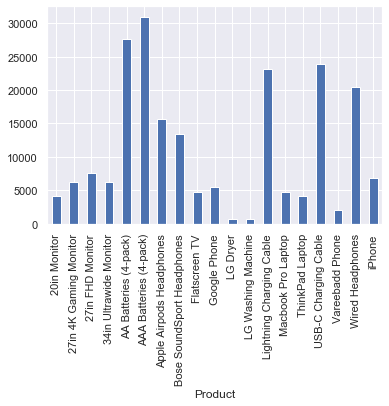

In [36]:
df.groupby("Product").sum()["Quantity Ordered"].plot(kind="bar")

this is the frequency of the individual product sold

and since it is clear from the data that the AAA Batteries (4-pack) got sold maximum time

# What was the best month for sales? How much was earned that month?

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,Purchase Address,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99


In [38]:
groups=df.groupby("OrderDate")

In [39]:
df["OrderDate"] = pd.to_datetime(df['OrderDate'])
df.index = df['OrderDate'] 
df.resample('M').sum()
#pd.options.display.float_format = '{:.2f}'.format get rid of e format values

,Quantity Ordered,Price Each,sales
OrderDate,,,
2019-01-31,10852,1802421.41,1812742.87
2019-02-28,13429,2186547.40,2199685.10
2019-03-31,16977,2789060.74,2804949.45
2019-04-30,20534,3366191.86,3389191.08
2019-05-31,18651,3132980.77,3150462.39
2019-06-30,15232,2560338.56,2576115.21
2019-07-31,16052,2629513.13,2644749.33
2019-08-31,13427,2226850.92,2240970.39
2019-09-30,13089,2081187.66,2093755.70


by looking at the data we can say that december month got the largest sales with the amount of $4608265.80

# What city sold the most products?

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,Purchase Address,sales
OrderDate,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [41]:
df.reset_index(drop=True, inplace=True)  #removing the index

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,Purchase Address,sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


In [43]:
#df["Purchase Address"].str.split()

In [44]:
df.rename(columns={"Purchase Address":"PurchaseAddress"},inplace=True)

In [45]:
df["Street"]=df["PurchaseAddress"].str.split(",", expand=True)[0]

In [46]:
df["CITY"]=df["PurchaseAddress"].str.split(",", expand=True)[1]
#df[[["Street","City","State"]]]=df["PurchaseAddress"].apply(lambda x: pd.Series(str(x).split(",")))

In [47]:
df["State"]=df["PurchaseAddress"].str.split(",",expand=True)[2]

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,PurchaseAddress,sales,Street,CITY,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301


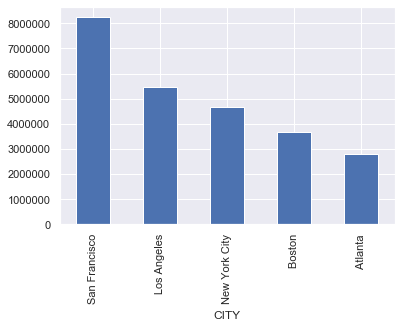

In [49]:
#df["CITY"].value_counts()
df.groupby("CITY").sum()["sales"].nlargest().plot(kind="bar")
#df.groupby("CITY").sum()["Quantity Ordered"].nlargest()

now it is clear that San Francisco has the highest sales

# What time should we display advertisements to maximize the likelihood of the customer’s buying products?

In [50]:
df.reset_index(drop=True, inplace=True)
df["OrderDate"]=pd.to_datetime(df["OrderDate"])
"""df["OrderDate"] = pd.to_datetime(df['OrderDate'])
df.index = df['OrderDate'] 
df.resample('H').sum()
df.sort_index()"""

'df["OrderDate"] = pd.to_datetime(df[\'OrderDate\'])\ndf.index = df[\'OrderDate\'] \ndf.resample(\'H\').sum()\ndf.sort_index()'

In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,PurchaseAddress,sales,Street,CITY,State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301


In [52]:
df['Hour']= df['OrderDate'].dt.hour
df['Minute']= df['OrderDate'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,PurchaseAddress,sales,Street,CITY,State,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301,11,59


In [53]:
df.sort_values(["Hour","Minute"])

,Order ID,Product,Quantity Ordered,Price Each,OrderDate,PurchaseAddress,sales,Street,CITY,State,Hour,Minute
487,141710,USB-C Charging Cable,1,11.95,2019-01-23 00:00:00,"57 Hill St, New York City, NY 10001",11.95,57 Hill St,New York City,NY 10001,0,0
505,141728,AAA Batteries (4-pack),1,2.99,2019-01-14 00:00:00,"431 7th St, New York City, NY 10001",2.99,431 7th St,New York City,NY 10001,0,0
7584,148492,Apple Airpods Headphones,1,150.00,2019-01-08 00:00:00,"921 Main St, San Francisco, CA 94016",150.00,921 Main St,San Francisco,CA 94016,0,0
9692,150522,20in Monitor,1,109.99,2019-02-12 00:00:00,"633 Cherry St, Boston, MA 02215",109.99,633 Cherry St,Boston,MA 02215,0,0
16060,156643,Apple Airpods Headphones,1,150.00,2019-02-28 00:00:00,"520 Maple St, New York City, NY 10001",150.00,520 Maple St,New York City,NY 10001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
157389,292477,27in 4K Gaming Monitor,1,389.99,2019-11-15 23:59:00,"788 River St, San Francisco, CA 94016",389.99,788 River St,San Francisco,CA 94016,23,59
172792,307267,USB-C Charging Cable,1,11.95,2019-12-08 23:59:00,"142 Maple St, Seattle, WA 98101",11.95,142 Maple St,Seattle,WA 98101,23,59
173568,308024,Lightning Charging Cable,1,14.95,2019-12-30 23:59:00,"615 6th St, Dallas, TX 75001",14.95,615 6th St,Dallas,TX 75001,23,59
175938,310311,20in Monitor,1,109.99,2019-12-24 23:59:00,"629 13th St, Boston, MA 02215",109.99,629 13th St,Boston,MA 02215,23,59


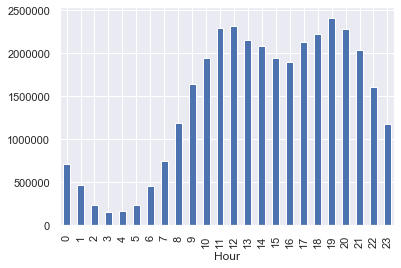

In [54]:
df.groupby("Hour").sum()["sales"].plot(kind="bar")

since we can visualise the graph between hour and sales.so the best time for advertisement is 6am to 10am and 4pm to 6pm

# What products are most often sold together?

In [55]:
df = df[df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\JAI MATA DI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [57]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 984
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
